In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

<h2>Importing & Exploring The Dataset</h2>

In [37]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present_20241212.csv')

In [38]:
print(f"Total Requests: {data.shape[0]} and {data.shape[1]} columns")
full_len = data.shape[0]

Total Requests: 3238500 and 43 columns


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238500 entries, 0 to 3238499
Data columns (total 43 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unique Key                      int64  
 1   Created Date                    object 
 2   Closed Date                     object 
 3   Agency                          object 
 4   Agency Name                     object 
 5   Complaint Type                  object 
 6   Descriptor                      object 
 7   Location Type                   object 
 8   Incident Zip                    float64
 9   Incident Address                object 
 10  Street Name                     object 
 11  Cross Street 1                  object 
 12  Cross Street 2                  object 
 13  Intersection Street 1           object 
 14  Intersection Street 2           object 
 15  Address Type                    object 
 16  City                            object 
 17  Landmark                   

In [40]:
# Check for missing values
print('Total Numebr of Null Values By column:')
print(data.isnull().sum())

missing_percentage = (data.isnull().sum() / len(data)) * 100


print('\nNumber of Unique Values By Column')
# Display unique values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")

Total Numebr of Null Values By column:
Unique Key                              0
Created Date                            0
Closed Date                        180358
Agency                                  0
Agency Name                             0
Complaint Type                          0
Descriptor                         107423
Location Type                      392982
Incident Zip                        32619
Incident Address                   113257
Street Name                        113372
Cross Street 1                     904406
Cross Street 2                     904184
Intersection Street 1             1041077
Intersection Street 2             1039697
Address Type                        13183
City                               155089
Landmark                          1269328
Facility Type                     3224981
Status                                  0
Due Date                          3220620
Resolution Description             136230
Resolution Action Updated Date      8

In [41]:
# Get summary statistics
display(data.describe())

,Unique Key,Incident Zip,BBL,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Community Districts,Police Precinct
count,3.238500e+06,3.205881e+06,2.877961e+06,3.187054e+06,3.187194e+06,3.187032e+06,3.187032e+06,3.186334e+06,3.186336e+06
mean,6.163235e+07,1.081627e+04,2.703149e+09,1.005902e+06,2.078469e+05,4.073712e+01,-7.392184e+01,3.695156e+01,4.108092e+01
std,1.001692e+06,5.902589e+02,1.159086e+09,2.089906e+04,3.124246e+04,8.575319e-02,7.537923e-02,2.039169e+01,2.080035e+01
min,5.989397e+07,0.000000e+00,0.000000e+00,9.133570e+05,1.210980e+05,4.049881e+01,-7.425494e+01,1.000000e+00,1.000000e+00
25%,6.076181e+07,1.045100e+04,2.027230e+09,9.934740e+05,1.848620e+05,4.067404e+01,-7.396673e+01,2.000000e+01,2.600000e+01
50%,6.163248e+07,1.120300e+04,3.016580e+09,1.004850e+06,2.051780e+05,4.072979e+01,-7.392567e+01,3.900000e+01,4.000000e+01
75%,6.250294e+07,1.123500e+04,4.005880e+09,1.018947e+06,2.364420e+05,4.081562e+01,-7.387475e+01,5.400000e+01,6.000000e+01
max,6.336087e+07,9.512800e+04,5.270001e+09,1.067279e+06,2.718760e+05,4.091287e+01,-7.370038e+01,7.100000e+01,7.700000e+01


<h2>Response Time: Computation, Cleaning & Preprocessing</h2>
<ul>
    <li>Compute Response time in hrs by substracting open date from closed date</li>
    <li>Check for missing closed date values and remove them</li>
    <li>Check for invalid response time such as negative values and 0</li>
</ul>

In [42]:
# Keep only the closed requests as we are building a model for the response time of closed cases
print(data['Status'].value_counts())


# Calculate the total number of cases
total_cases = data['Status'].value_counts().sum()

# Calculate the percentage of closed cases
closed_cases = data['Status'].value_counts().get('Closed', 0)
percentage_closed = (closed_cases / total_cases) * 100
print(f"\n{closed_cases} closed cases out of a otal of {total_cases} --> {percentage_closed:.2f}%")

data = data[data['Status']=='Closed'].reset_index(drop=True)

Status
Closed         3063567
In Progress     105468
Open             51927
Assigned         12258
Pending           3574
Started           1621
Unspecified         85
Name: count, dtype: int64

3063567 closed cases out of a otal of 3238500 --> 94.60%


In [46]:
# Converting created and closed date to pandas datetime
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Closed Date'] = pd.to_datetime(data['Closed Date'])

# Computing the response time in hours by substracting the closed date from the created date
data['Response Time (hrs)'] = (data['Closed Date'] - data['Created Date']).dt.total_seconds() / 3600

/var/folders/vr/10ysjkdj22l84y4h_d1c1j5w0000gn/T/ipykernel_5534/3044650402.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Created Date'] = pd.to_datetime(data['Created Date'])
/var/folders/vr/10ysjkdj22l84y4h_d1c1j5w0000gn/T/ipykernel_5534/3044650402.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Closed Date'] = pd.to_datetime(data['Closed Date'])


In [47]:
# Computing the percentage of missing values (Requests with no closing date)
missing_closed_date_count = data['Closed Date'].isnull().sum()
total_rows = data.shape[0]
missing_percentage = (missing_closed_date_count / total_rows) * 100
print(f"Missing Closed Date: {missing_closed_date_count} rows ({missing_percentage:.2f}%)")


# Filtering out closed date missing values
data = data[data['Closed Date'].notnull()]


# Computing the percentage of invalid response time
invalid_response_time_count = (data['Response Time (hrs)'] <= 0).sum()
total_rows = data.shape[0]
missing_percentage = (invalid_response_time_count / total_rows) * 100
print(f"Invalid Response Time: {invalid_response_time_count} rows ({missing_percentage:.2f}%)")

# Filtering out invalid response time
data = data[data['Response Time (hrs)'] > 0]

Missing Closed Date: 26721 rows (0.87%)
Invalid Response Time: 53162 rows (1.75%)


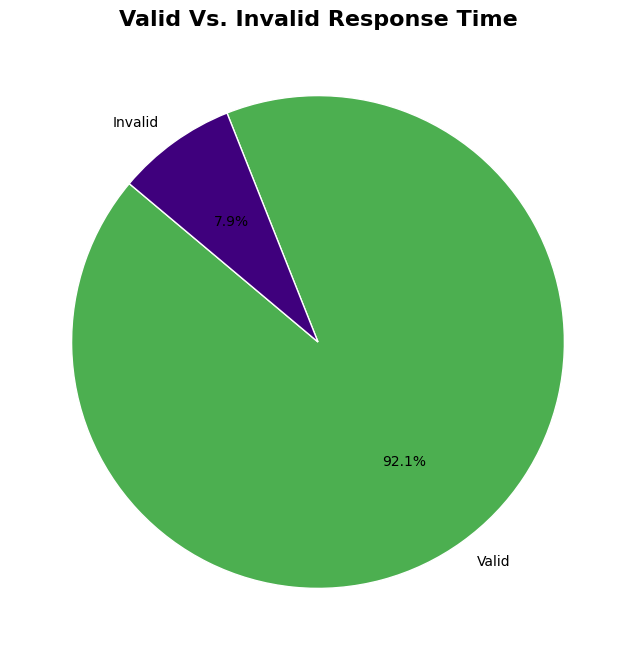

In [64]:
valid = len(data)*100/full_len
invalid = 100 - valid
import matplotlib.pyplot as plt

# Data
sizes = [valid, invalid]
labels = ['Valid', 'Invalid']
colors = ['#4CAF50', '#3F007D']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})

# Title
plt.title('Valid Vs. Invalid Response Time', fontsize=16, fontweight='bold')

# Show the pie chart
plt.show()


<h2>Data Preprocessing</h2>

<h3>1. Removing Irrelevant/Duplicate Columns</h3>

In [83]:
irrelevant_columns = ['Unique Key','Agency Name', 'Status', 'X Coordinate (State Plane)', 
                      'Y Coordinate (State Plane)', 'Location', 'Park Borough','Street Name',
                      'Cross Street 1','Cross Street 2','Intersection Street 1','Intersection Street 2',
                      'Resolution Description','Resolution Action Updated Date','BBL']

data = data.drop(columns=irrelevant_columns, errors='ignore')

<h3>2. Missing Values</h3>

<h4>Remove Columns where more than 90% of values are null</h4>

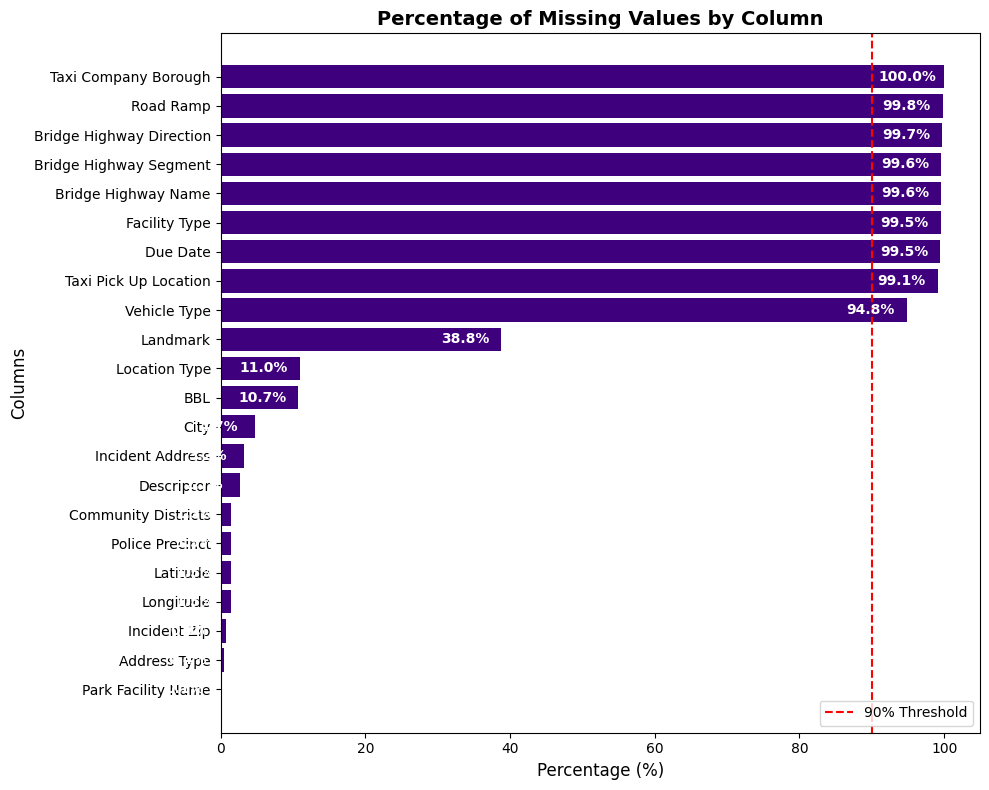

In [71]:
import matplotlib.pyplot as plt

# Calculate missing values percentage for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Filter only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(missing_percentage.index, missing_percentage, color='#3F007D')

# Add value labels on each bar
for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', ha='center', va='center', fontsize=10, color='white', weight='bold')

# Titles and labels
plt.title('Percentage of Missing Values by Column', fontsize=14, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Columns', fontsize=12)

# Add a threshold line at 90%
plt.axvline(x=90, color='red', linestyle='--', label='90% Threshold')

# Adjust layout and show legend
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()


In [73]:
# Calculate missing values percentage for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

#Display columns with missing values
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


# Remove columns where more than 90% are missing values
threshold = 90
columns_to_drop = missing_percentage[missing_percentage > threshold].index
data = data.drop(columns=columns_to_drop)

Taxi Company Borough        99.955458
Road Ramp                   99.772664
Bridge Highway Direction    99.746086
Bridge Highway Segment      99.584809
Bridge Highway Name         99.583501
Facility Type               99.547104
Due Date                    99.465962
Taxi Pick Up Location       99.131443
Vehicle Type                94.847946
Landmark                    38.790569
Location Type               10.976732
BBL                         10.742324
City                         4.724931
Incident Address             3.189111
Descriptor                   2.686712
Community Districts          1.482027
Police Precinct              1.481926
Latitude                     1.462822
Longitude                    1.462822
Incident Zip                 0.791739
Address Type                 0.423771
Park Facility Name           0.102658
dtype: float64


In [75]:
## Park Facility Name has a 99.4% Unspecified values, this column should be removed as part of the columns with more than 90% missing values

data['Park Facility Name'].value_counts()
park_facility_counts = data['Park Facility Name'].value_counts()
print(((park_facility_counts / len(data)) * 100)[0:5])

data.drop(columns = 'Park Facility Name', inplace=True)


## Address Type

Park Facility Name
Unspecified                     99.444345
Flushing Meadows Corona Park     0.025371
Central Park                     0.015049
Washington Square Park           0.010557
Prospect Park                    0.009753
Name: count, dtype: float64


In [77]:
data['Address Type'].value_counts()

Address Type
ADDRESS         2723549
INTERSECTION     197231
BLOCKFACE         30588
UNRECOGNIZED      18586
PLACENAME          1086
Name: count, dtype: int64

<h4>Handle Missing Values for Remaning Rows</h4>
<ul>
    <li>Replace Missing Values with "Other" for categorical variables</li>
    <li>Replace Null Values with the mean/mode for numerical variables</li>
</ul>

In [79]:
#Replace Missing Values with "Other" for categorical variables
categorical_columns = data.select_dtypes(include = ['object']).columns.tolist()
print(data[categorical_columns].isnull().sum())

# Replace Null Values with "Other"
data[categorical_columns] = data[categorical_columns].fillna('Other')

Agency                          0
Complaint Type                  0
Descriptor                  80163
Location Type              327511
Incident Address            95153
Address Type                12644
City                       140977
Landmark                  1157388
Community Board                 0
Borough                         0
Open Data Channel Type          0
dtype: int64


In [85]:
# Numerical Values
numerical_columns = data.select_dtypes(include = ['int64','float64']).columns.tolist()
print(data[numerical_columns].isnull().sum())

Incident Zip           23623
Latitude               43646
Longitude              43646
Community Districts    44219
Police Precinct        44216
Response Time (hrs)        0
dtype: int64


In [87]:
data['Community Districts'] = data['Community Districts'].fillna(data['Community Districts'].mode()[0])
data['Police Precinct'] = data['Police Precinct'].fillna(data['Police Precinct'].mode()[0])
data['Incident Zip'] = data['Incident Zip'].fillna(data['Incident Zip'].mode()[0])


data['Latitude'] = data['Latitude'].fillna(data['Latitude'].median())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].median())

<h3>3. Feature Enginnering</h3>

<h4>1. Temporal Features</h4>

In [89]:
# Extracting hour, day, weekday and month of the date when the complaint was created
data['Created Hour'] = data['Created Date'].dt.hour
data['Created Day'] = data['Created Date'].dt.day
data['Created Month'] = data['Created Date'].dt.month
data['Created Weekday'] = data['Created Date'].dt.weekday
data['Is_Weekend'] = data['Created Weekday'].isin([5, 6]).astype(int)

In [92]:
# Create the mapping dictionary for complaint type
#Complaint Type Grouping
complaint_mapping = {
    "Noise - Residential": "Noise Complaints",
    "Noise - Street/Sidewalk": "Noise Complaints",
    "Noise - Commercial": "Noise Complaints",
    "Noise - Vehicle": "Noise Complaints",
    "Noise - Helicopter": "Noise Complaints",
    "Noise - Park": "Noise Complaints",
    "Noise": "Noise Complaints",
    "Noise - House of Worship": "Noise Complaints",
    
    "Illegal Parking": "Parking/Vehicle Issues",
    "Abandoned Vehicle": "Parking/Vehicle Issues",
    "Derelict Vehicles": "Parking/Vehicle Issues",
    "For Hire Vehicle Complaint": "Parking/Vehicle Issues",
    "Blocked Driveway": "Parking/Vehicle Issues",
    "Dispatched Taxi Complaint": "Parking/Vehicle Issues",
    "Green Taxi Complaint": "Parking/Vehicle Issues",
    "Abandoned Bike": "Parking/Vehicle Issues",
    "Broken Parking Meter": "Parking/Vehicle Issues",
    
    "Street Condition": "Infrastructure Issues",
    "Sidewalk Condition": "Infrastructure Issues",
    "Street Light Condition": "Infrastructure Issues",
    "Traffic Signal Condition": "Infrastructure Issues",
    "Curb Condition": "Infrastructure Issues",
    "Street Sign - Damaged": "Infrastructure Issues",
    "Street Sign - Dangling": "Infrastructure Issues",
    "Street Sign - Missing": "Infrastructure Issues",
    "Bridge Condition": "Infrastructure Issues",
    "Highway Condition": "Infrastructure Issues",
    
    "Dirty Condition": "Sanitation Issues",
    "UNSANITARY CONDITION": "Sanitation Issues",
    "Illegal Dumping": "Sanitation Issues",
    "Blocked Driveway": "Sanitation Issues",
    "Missed Collection": "Sanitation Issues",
    "Residential Disposal Complaint": "Sanitation Issues",
    "Street Sweeping Complaint": "Sanitation Issues",
    "Litter Basket Request": "Sanitation Issues",
    "Dumpster Complaint": "Sanitation Issues",
    "Sanitation Worker or Vehicle Complaint": "Sanitation Issues",
    "Recycling Basket Complaint": "Sanitation Issues",
    
    "HEAT/HOT WATER": "Utilities Issues",
    "PLUMBING": "Utilities Issues",
    "WATER LEAK": "Utilities Issues",
    "Sewer": "Utilities Issues",
    "Electric": "Utilities Issues",
    "Water System": "Utilities Issues",
    "Cooling Tower": "Utilities Issues",
    "Water Conservation": "Utilities Issues",
    
    "Damaged Tree": "Trees/Greenery",
    "Dead/Dying Tree": "Trees/Greenery",
    "Overgrown Tree/Branches": "Trees/Greenery",
    "Illegal Tree Damage": "Trees/Greenery",
    "New Tree Request": "Trees/Greenery",
    "Plant": "Trees/Greenery",
    "Uprooted Stump": "Trees/Greenery",
    
    "Drug Activity": "Enforcement/Crime",
    "Vendor Enforcement": "Enforcement/Crime",
    "Non-Emergency Police Matter": "Enforcement/Crime",
    "Panhandling": "Enforcement/Crime",
    "Illegal Fireworks": "Enforcement/Crime",
    "Encampment": "Enforcement/Crime",
    "Graffiti": "Enforcement/Crime",
    
    "Dead Animal": "Animal Issues",
    "Animal-Abuse": "Animal Issues",
    "Rodent": "Animal Issues",
    "Unsanitary Animal Pvt Property": "Animal Issues",
    "Mosquitoes": "Animal Issues",
    "Unsanitary Pigeon Condition": "Animal Issues",
    "Animal in a Park": "Animal Issues",
    
    "PAINT/PLASTER": "Building Complaints",
    "DOOR/WINDOW": "Building Complaints",
    "FLOORING/STAIRS": "Building Complaints",
    "APPLIANCE": "Building Complaints",
    "General Construction/Plumbing": "Building Complaints",
    "Building/Use": "Building Complaints",
    "Elevator": "Building Complaints",
    "Plumbing": "Building Complaints",
    "School Maintenance": "Building Complaints",
    
    "Homeless Person Assistance": "Homeless/Social Issues",
    "Encampment": "Homeless/Social Issues",
    "Residential Disposal Complaint": "Homeless/Social Issues",
    "Squeegee": "Homeless/Social Issues",
    "Disorderly Youth": "Homeless/Social Issues",
    
    "Air Quality": "Air Quality Issues",
    "Indoor Air Quality": "Air Quality Issues",
    "Indoor Sewage": "Air Quality Issues",
    
    "Consumer Complaint": "Consumer/Public Safety",
    "SAFETY": "Consumer/Public Safety",
    "Traffic": "Consumer/Public Safety",
    "Food Establishment": "Consumer/Public Safety",
    "Public Toilet": "Consumer/Public Safety",
    
    "Graffiti": "Other/Miscellaneous",
    "Lost Property": "Other/Miscellaneous",
    "Maintenance or Facility": "Other/Miscellaneous",
    "Obstruction": "Other/Miscellaneous",
    "Elevator": "Other/Miscellaneous",
    "Incorrect Data": "Other/Miscellaneous",
    "Special Operations": "Other/Miscellaneous",
    "Wayfinding": "Other/Miscellaneous"
}


# Apply the mapping to the dataset
data['Complaint Group'] = data['Complaint Type'].map(complaint_mapping).fillna("Other/Miscellaneous")

In [94]:
data[['Complaint Group', 'Response Time (hrs)']].groupby('Complaint Group').mean().reset_index()

,Complaint Group,Response Time (hrs)
0,Air Quality Issues,65.245417
1,Animal Issues,76.276732
2,Building Complaints,508.373294
3,Consumer/Public Safety,410.707168
4,Enforcement/Crime,1.560195
5,Homeless/Social Issues,38.710346
6,Infrastructure Issues,173.042323
7,Noise Complaints,30.433357
8,Other/Miscellaneous,428.372391
9,Parking/Vehicle Issues,57.953991


In [96]:
## all categorical columns with more than 100 categories, get 95% of the values and assign the rest "Other"
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()}")

Agency: 14
Complaint Type: 173
Descriptor: 879
Location Type: 126
Incident Address: 507717
Address Type: 6
City: 216
Landmark: 8739
Community Board: 77
Borough: 6
Open Data Channel Type: 5
Complaint Group: 13


In [98]:
column_list = ['Complaint Type', 'Location Type', 'City', 'Descriptor', 'Incident Zip']

for column_name in column_list:
    # Calculate the cumulative percentage for the column
    value_counts = data[column_name].value_counts(normalize=True).cumsum()
    
    # Identify the categories that make up 95% of the incidents
    top_categories = value_counts[value_counts <= 0.95].index
    
    # Replace all other categories with 'Other'
    data[column_name] = data[column_name].apply(lambda x: x if x in top_categories else 'Other')

In [100]:
# Creating a binary landmark variable to assess wether or not incidents close to landmarks affects response time
# Droping the landmarks column as it has high cardinality and adds uneccessary complexity for the model

#Reduces the number of categories, making analysis and modeling more efficient.
#Helps prevent overfitting in models due to sparse or insignificant categories

data[data['Landmark']!='Other']['Response Time (hrs)'].median()
data[data['Landmark']=='Other']['Response Time (hrs)'].median()

data['is_landmark'] = (data['Landmark'] != 'Other').astype(int)
data = data.drop(columns='Landmark')

<h3>Exploratory Data Analysis (EDA)</h3>

<p>Key Questions to Answer</p>
<ul>
    <li>Which complaint types have the fastest and slowest response times?</li>
    <li>How do response times vary by borough or location?</li>
    <li>Are there outliers in response times, and can they be explained?</li>
    <li>Are there any trends over time or by hour of the day?</li>
</ul>

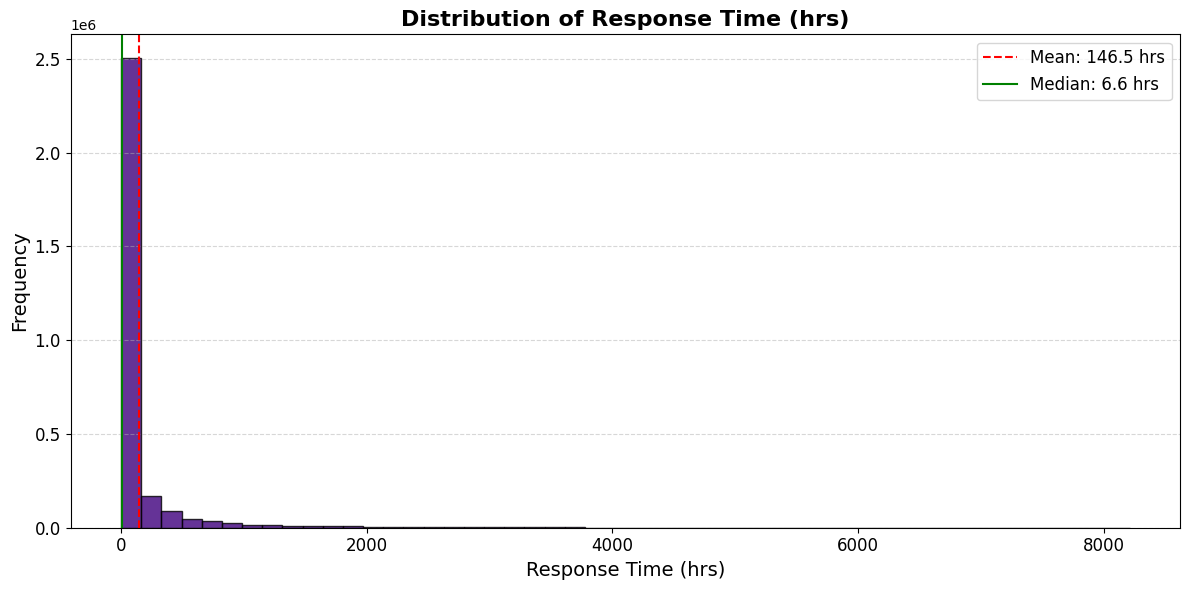

In [102]:
# Histogram for response time
plt.figure(figsize=(12, 6))
plt.hist(data['Response Time (hrs)'], bins=50, color='#3F007D', edgecolor='black', alpha=0.8)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add mean and median lines
mean_val = data['Response Time (hrs)'].mean()
median_val = data['Response Time (hrs)'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f} hrs')
plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_val:.1f} hrs')

# Titles and labels
plt.title('Distribution of Response Time (hrs)', fontsize=16, fontweight='bold')
plt.xlabel('Response Time (hrs)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customizing tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a legend
plt.legend(fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#Highly Skewed Distribution:
#Long Tail of Delays:


In [332]:
data['Response Time (hrs)'].std()

465.7025554388871

<h4>Response Time By Agency</h4>

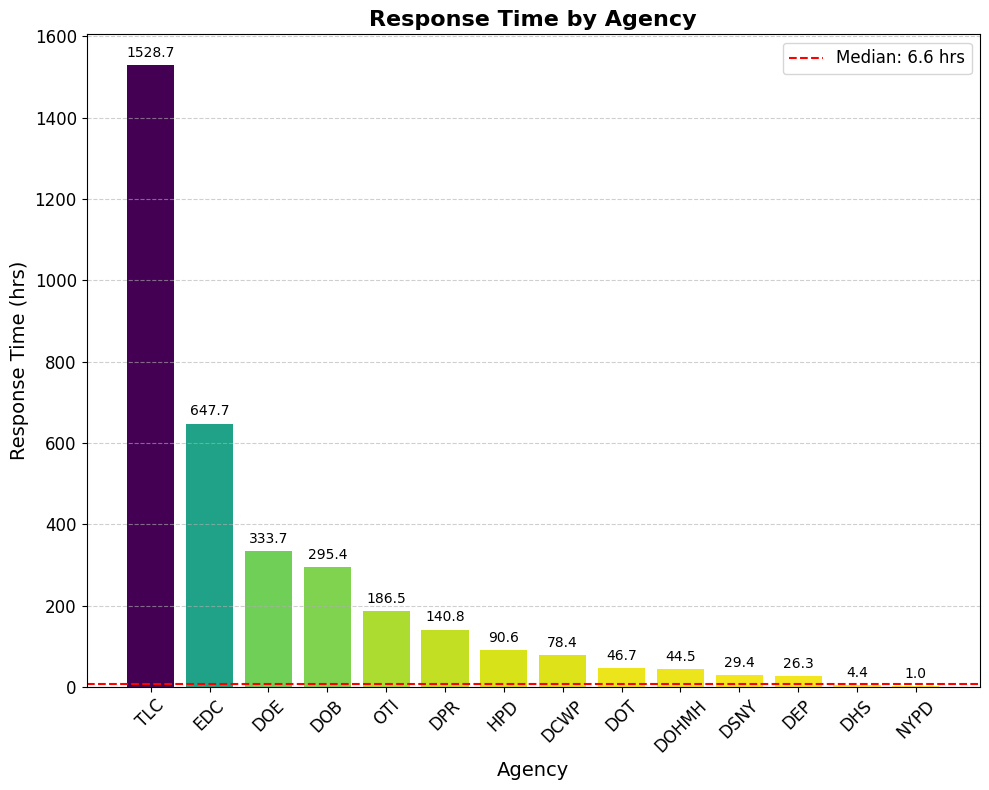

In [104]:
agency_resp = data[['Agency','Response Time (hrs)']].groupby('Agency').median().reset_index()

# Sort data by response time
agency_resp = agency_resp.sort_values('Response Time (hrs)', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(agency_resp['Agency'], agency_resp['Response Time (hrs)'], color=plt.cm.viridis_r(agency_resp['Response Time (hrs)'] / max(agency_resp['Response Time (hrs)'])))

# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20,
             f'{bar.get_height():.1f}', ha='center', fontsize=10)

# Add a horizontal line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Agency', fontsize=16, fontweight='bold')
plt.xlabel('Agency', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


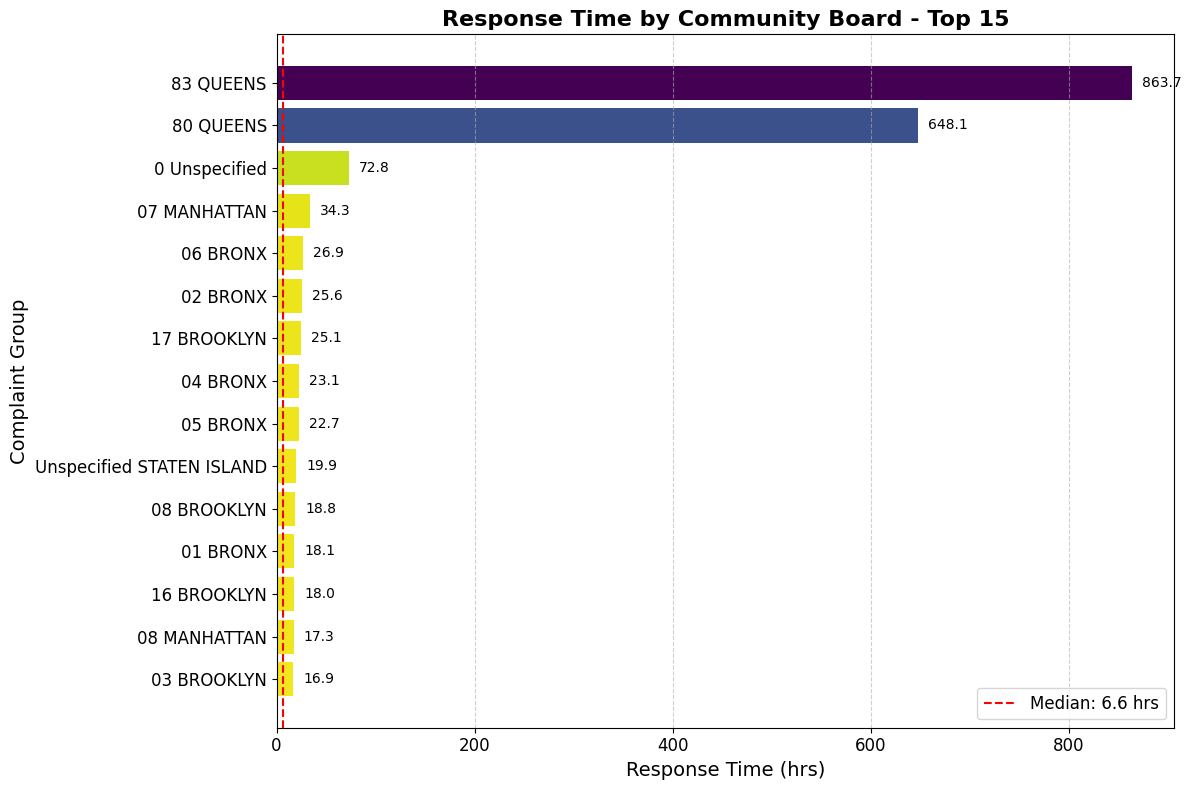

In [106]:
# Average response time by complaint type
comm_board_times = data.groupby('Community Board')['Response Time (hrs)'].median().sort_values(ascending=False).reset_index()[0:15]


# Sort data by response time
comm_board_times = comm_board_times.sort_values('Response Time (hrs)', ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(
    comm_board_times['Community Board'], 
    comm_board_times['Response Time (hrs)'], 
    color=plt.cm.viridis_r(comm_board_times['Response Time (hrs)'] / max(comm_board_times['Response Time (hrs)']))
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 10,  # Positioning text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.1f}', 
        va='center', fontsize=10
    )

# Add a vertical line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axvline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Community Board - Top 15', fontsize=16, fontweight='bold')
plt.xlabel('Response Time (hrs)', fontsize=14)
plt.ylabel('Complaint Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()

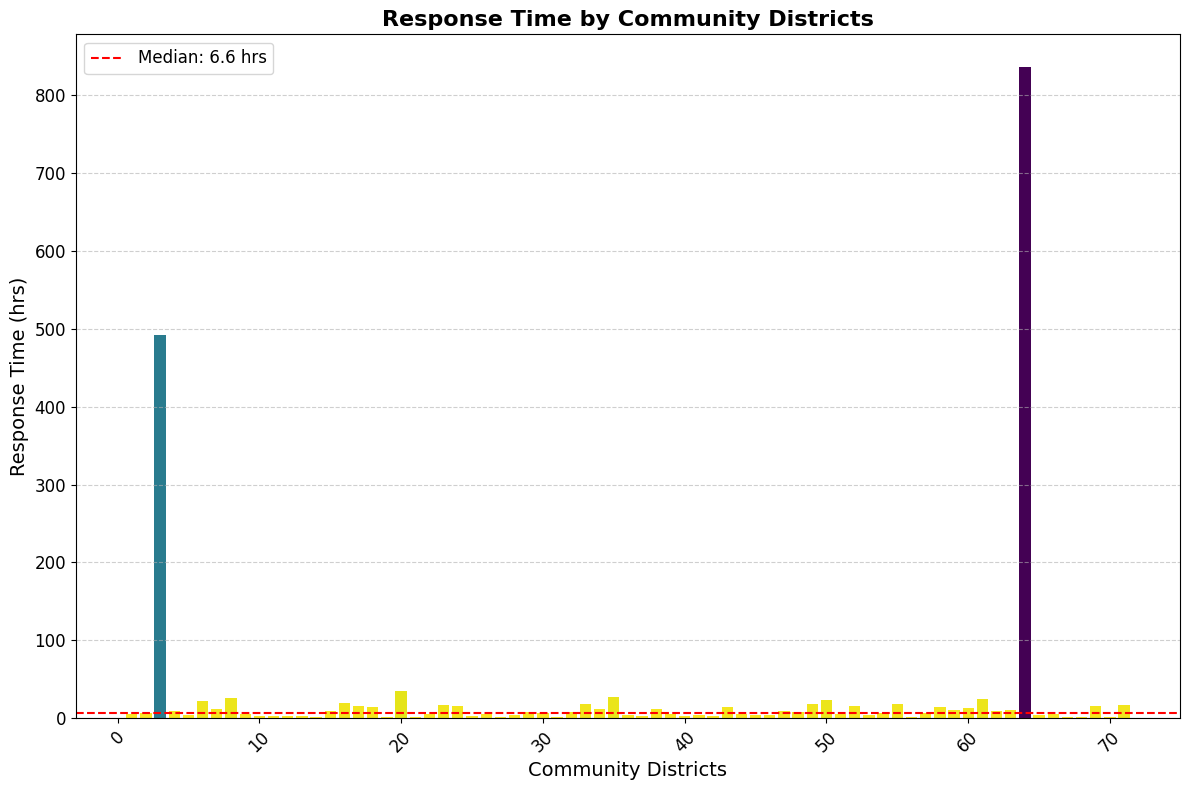

In [108]:
comm_districts_resp = data[['Community Districts','Response Time (hrs)']].groupby('Community Districts').median().reset_index()

# Sort data by response time
comm_districts_resp = comm_districts_resp.sort_values('Response Time (hrs)', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(comm_districts_resp['Community Districts'], comm_districts_resp['Response Time (hrs)'], color=plt.cm.viridis_r(comm_districts_resp['Response Time (hrs)'] / max(comm_districts_resp['Response Time (hrs)'])))

# Add labels on top of each bar
#for bar in bars:
 #   plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
  #           f'{bar.get_height():.1f}', ha='center', fontsize=10)

# Add a horizontal line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Community Districts', fontsize=16, fontweight='bold')
plt.xlabel('Community Districts', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

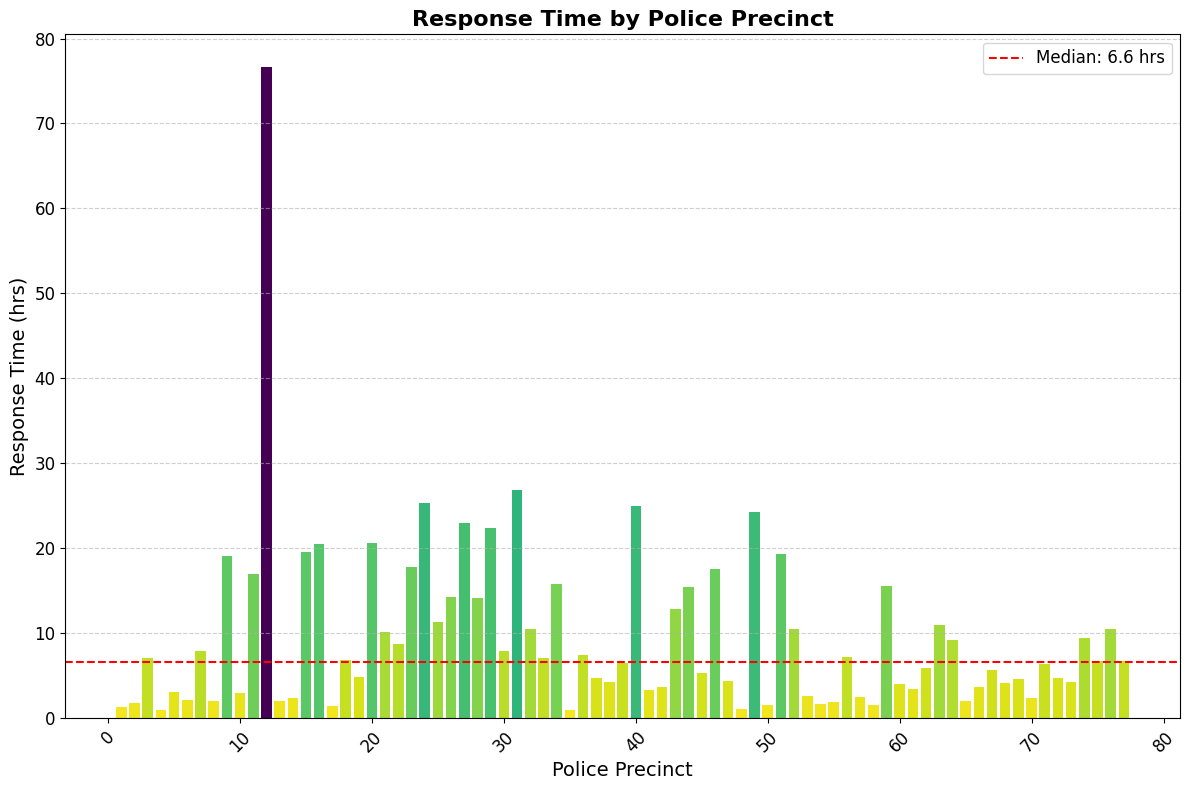

In [110]:
police_precinct_resp = data[['Police Precinct','Response Time (hrs)']].groupby('Police Precinct').median().reset_index()

# Sort data by response time
police_precinct_resp = police_precinct_resp.sort_values('Response Time (hrs)', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(police_precinct_resp['Police Precinct'], police_precinct_resp['Response Time (hrs)'], color=plt.cm.viridis_r(police_precinct_resp['Response Time (hrs)'] / max(police_precinct_resp['Response Time (hrs)'])))

# Add labels on top of each bar
#for bar in bars:
 #   plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
  #           f'{bar.get_height():.1f}', ha='center', fontsize=10)

# Add a horizontal line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Police Precinct', fontsize=16, fontweight='bold')
plt.xlabel('Police Precinct', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

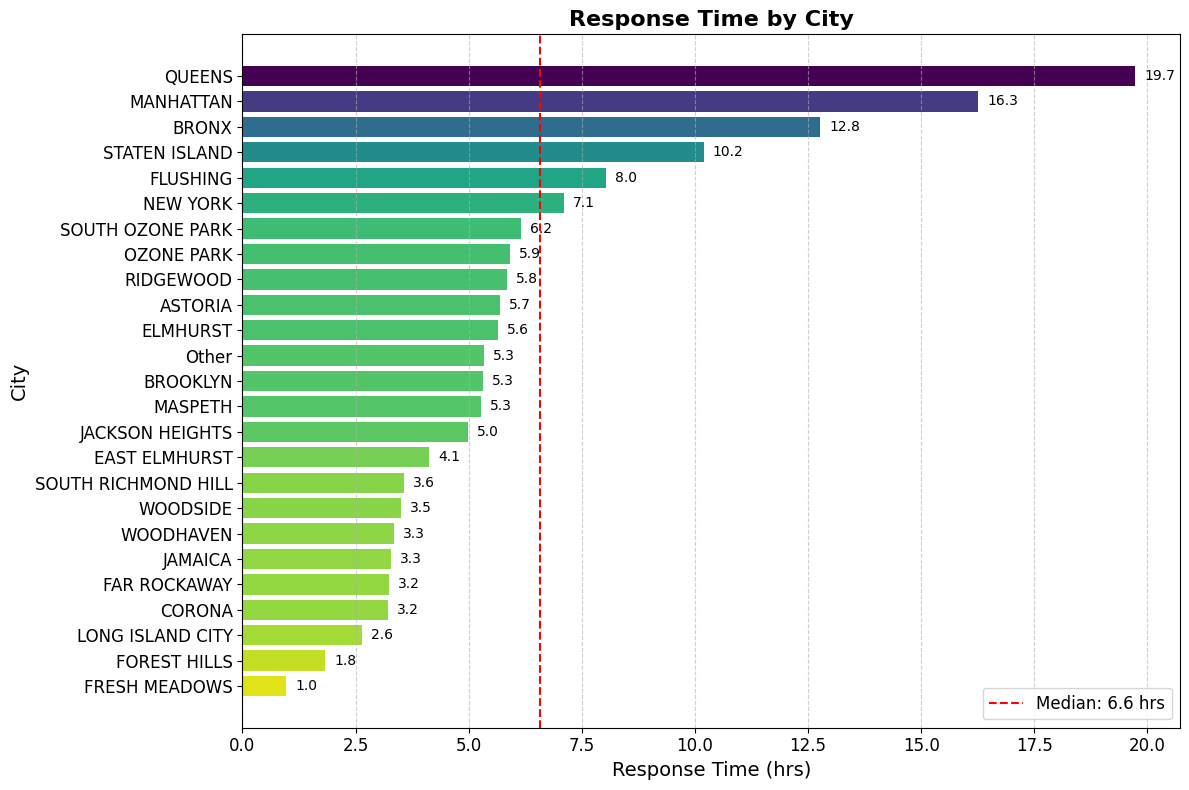

In [112]:
# Average response time by city
city_times = data.groupby('City')['Response Time (hrs)'].median().sort_values().reset_index()


# Sort data by response time
city_times = city_times.sort_values('Response Time (hrs)', ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(
    city_times['City'], 
    city_times['Response Time (hrs)'], 
    color=plt.cm.viridis_r(city_times['Response Time (hrs)'] / max(city_times['Response Time (hrs)']))
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 0.2,  # Positioning text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.1f}', 
        va='center', fontsize=10
    )

# Add a vertical line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axvline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by City', fontsize=16, fontweight='bold')
plt.xlabel('Response Time (hrs)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()

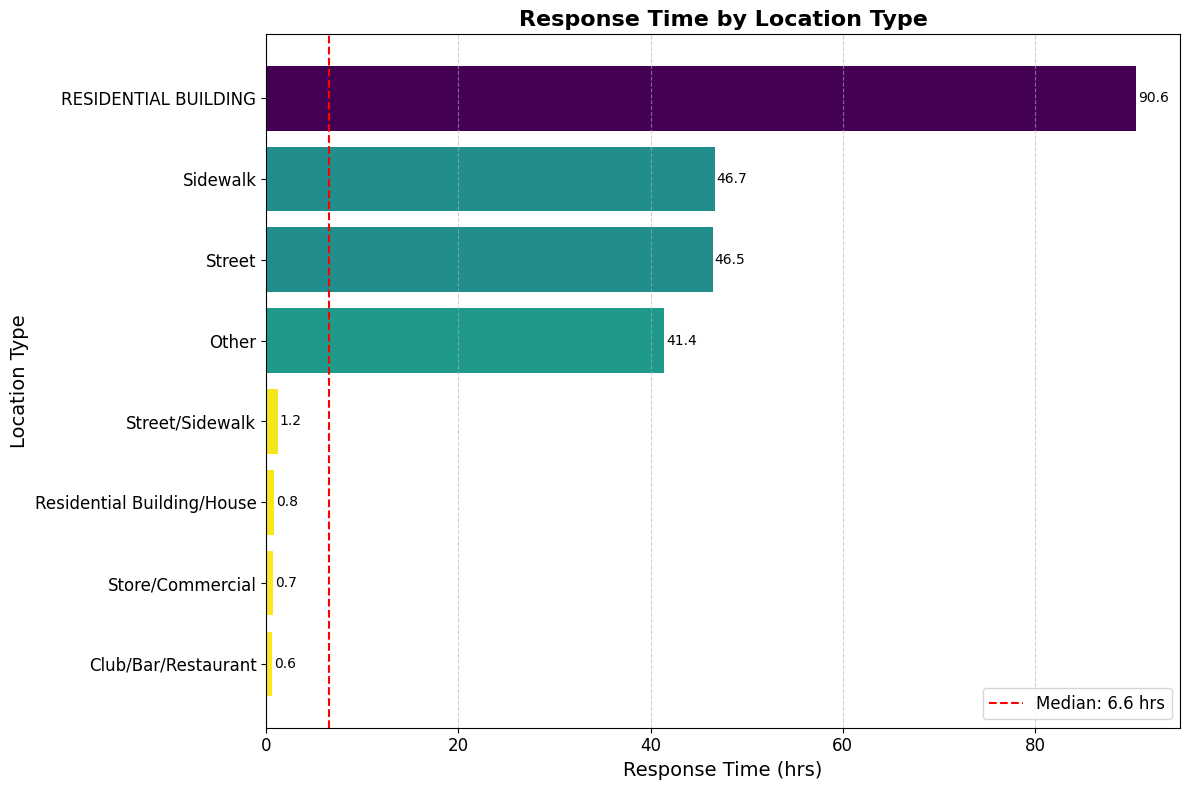

In [114]:
# Average response time by location type
loc_type_times = data.groupby('Location Type')['Response Time (hrs)'].median().sort_values().reset_index()


# Sort data by response time
loc_type_times = loc_type_times.sort_values('Response Time (hrs)', ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(
    loc_type_times['Location Type'], 
    loc_type_times['Response Time (hrs)'], 
    color=plt.cm.viridis_r(loc_type_times['Response Time (hrs)'] / max(loc_type_times['Response Time (hrs)']))
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 0.2,  # Positioning text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.1f}', 
        va='center', fontsize=10
    )

# Add a vertical line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axvline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Location Type', fontsize=16, fontweight='bold')
plt.xlabel('Response Time (hrs)', fontsize=14)
plt.ylabel('Location Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()

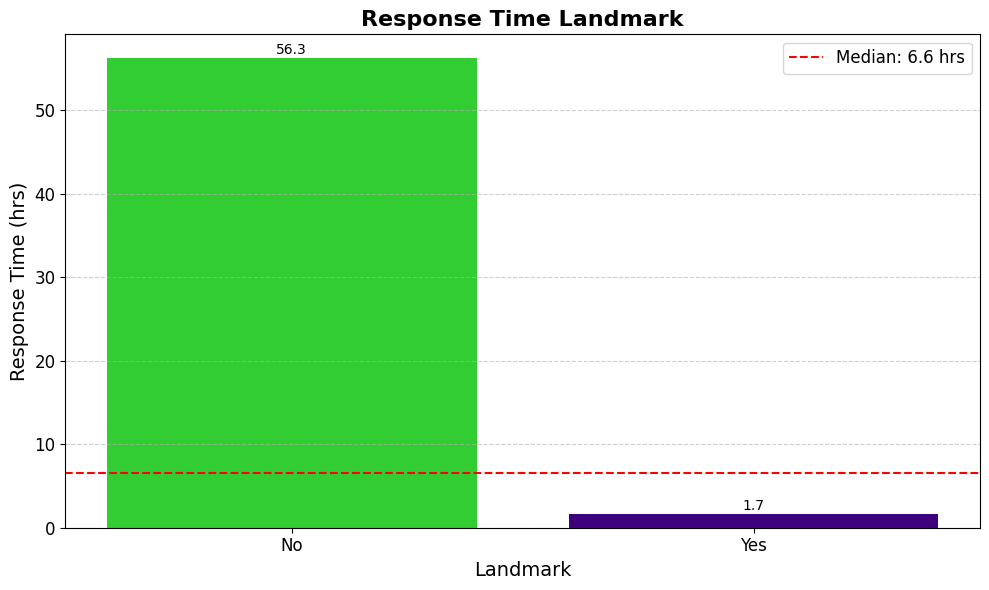

In [116]:
landmark_resp = data[['is_landmark','Response Time (hrs)']].groupby('is_landmark').median().reset_index()


colors = ['#32CD32', '#3F007D']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(landmark_resp['is_landmark'], landmark_resp['Response Time (hrs)'], 
               color=colors)

# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}', ha='center', fontsize=10)

avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time Landmark', fontsize=16, fontweight='bold')
plt.xlabel('Landmark', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)

landmark_label = ["No", "Yes"]
plt.xticks(ticks=landmark_resp['is_landmark'], labels=landmark_label, fontsize=12)

plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

<h4>Response Time By Complaint Type</h4>

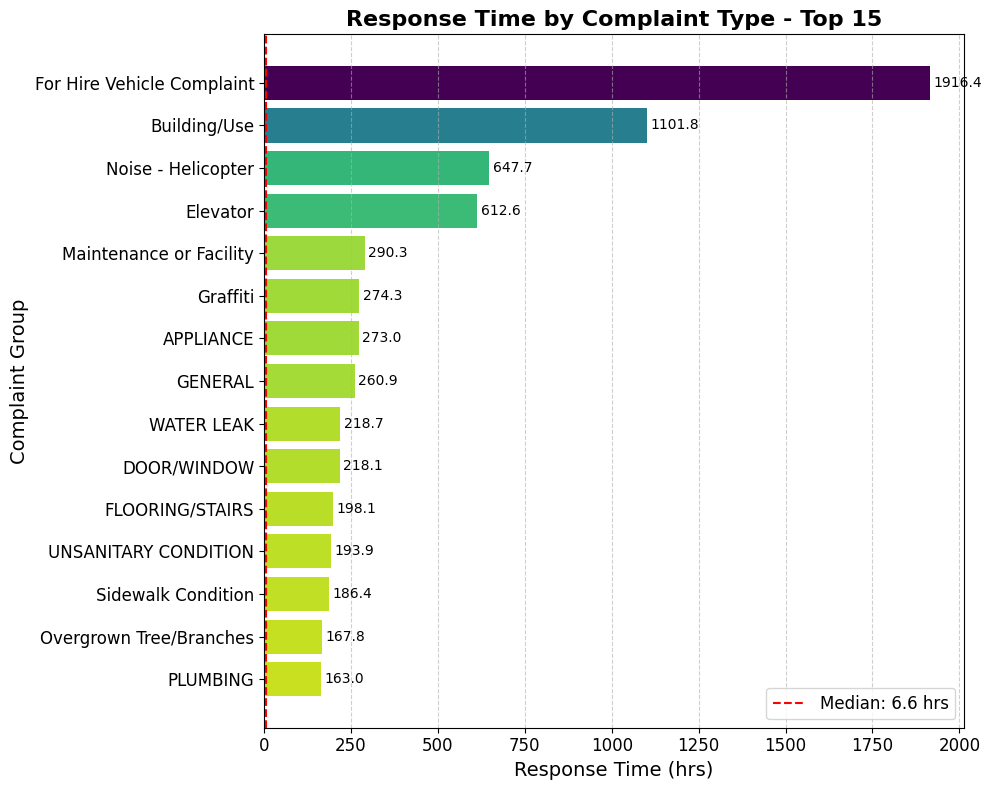

In [118]:
# Average response time by complaint type
complaint_times = data.groupby('Complaint Type')['Response Time (hrs)'].median().sort_values(ascending=False).reset_index()[0:15]


# Sort data by response time
complaint_times = complaint_times.sort_values('Response Time (hrs)', ascending=True)


# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(
    complaint_times['Complaint Type'], 
    complaint_times['Response Time (hrs)'], 
    color=plt.cm.viridis_r(complaint_times['Response Time (hrs)'] / max(complaint_times['Response Time (hrs)']))
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 10,  # Positioning text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.1f}', 
        va='center', fontsize=10
    )

# Add a vertical line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axvline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Complaint Type - Top 15', fontsize=16, fontweight='bold')
plt.xlabel('Response Time (hrs)', fontsize=14)
plt.ylabel('Complaint Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()

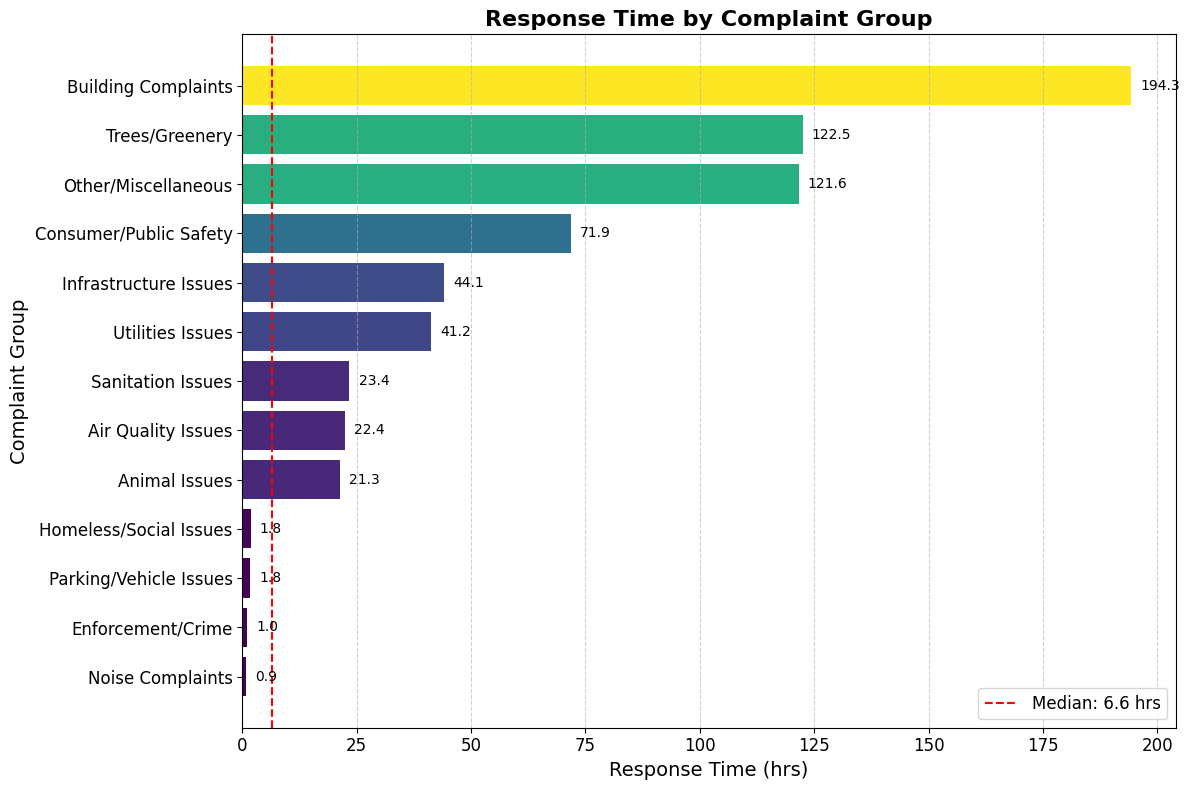

In [120]:
# Average response time by complaint group
complaint_group_times = data.groupby('Complaint Group')['Response Time (hrs)'].median().sort_values().reset_index()


# Sort data by response time
complaint_group_times = complaint_group_times.sort_values('Response Time (hrs)', ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(
    complaint_group_times['Complaint Group'], 
    complaint_group_times['Response Time (hrs)'], 
    color=plt.cm.viridis(complaint_group_times['Response Time (hrs)'] / max(complaint_group_times['Response Time (hrs)']))
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 2,  # Positioning text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.1f}', 
        va='center', fontsize=10
    )

# Add a vertical line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axvline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Complaint Group', fontsize=16, fontweight='bold')
plt.xlabel('Response Time (hrs)', fontsize=14)
plt.ylabel('Complaint Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()

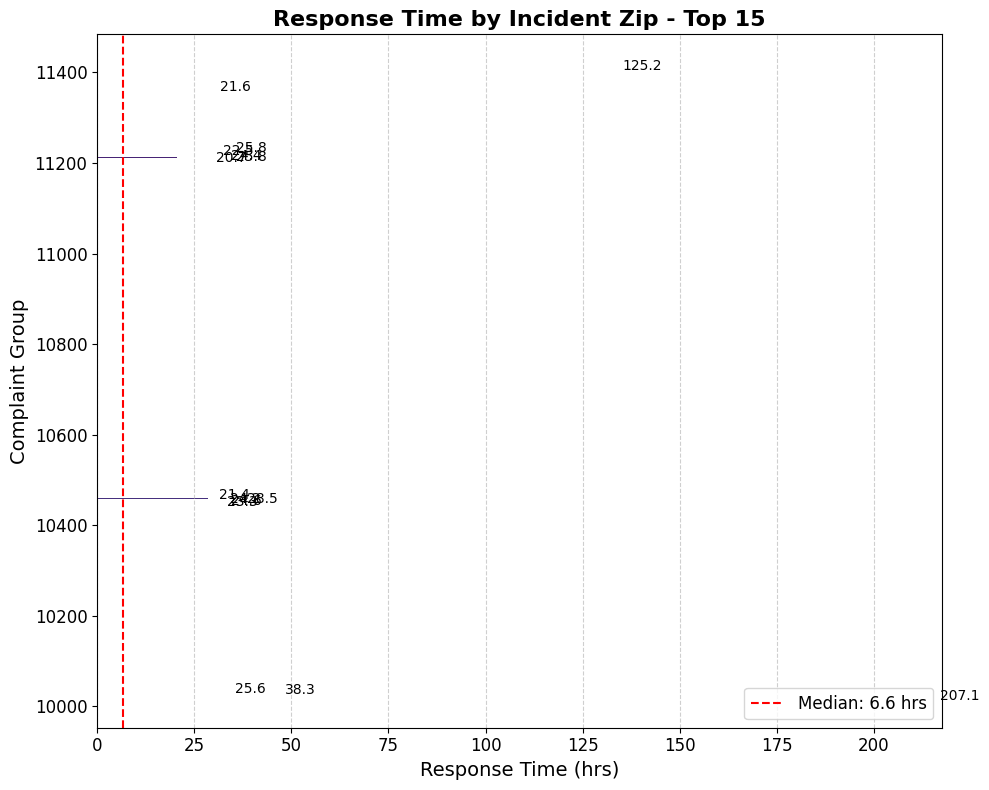

In [193]:
# Average response time by complaint type
zip_times = data.groupby('Incident Zip')['Response Time (hrs)'].median().sort_values(ascending=False).reset_index()[0:15]


# Sort data by response time
zip_times = zip_times.sort_values('Response Time (hrs)', ascending=True)


# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(
    zip_times['Incident Zip'], 
    zip_times['Response Time (hrs)'], 
    color=plt.cm.viridis(zip_times['Response Time (hrs)'] / max(zip_times['Response Time (hrs)']))
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 10,  # Positioning text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.1f}', 
        va='center', fontsize=10
    )

# Add a vertical line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axvline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Incident Zip - Top 15', fontsize=16, fontweight='bold')
plt.xlabel('Response Time (hrs)', fontsize=14)
plt.ylabel('Complaint Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()

<h4>Response Time By Channel Type</h4>

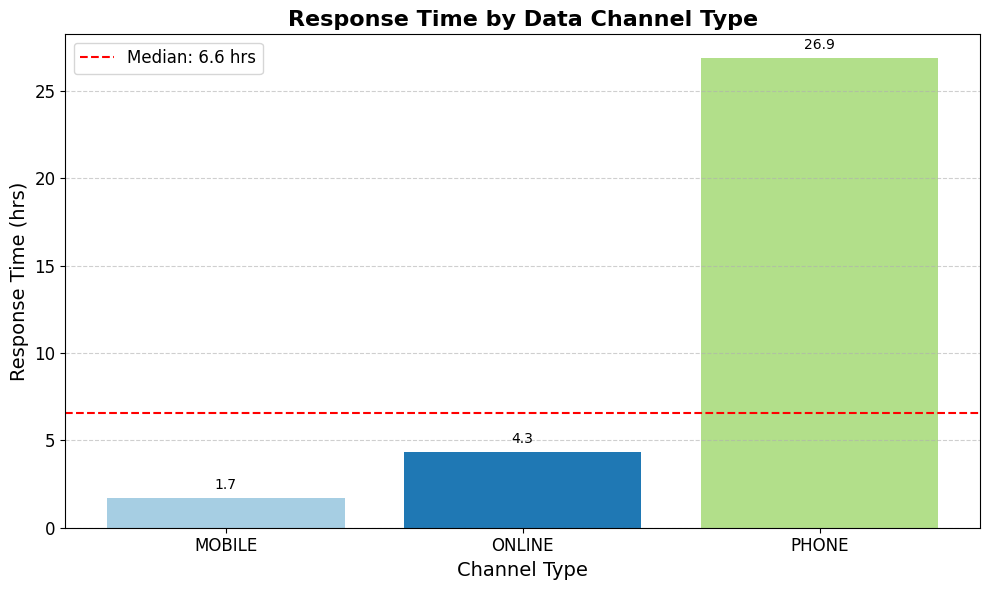

In [122]:
channel_resp = data[['Open Data Channel Type','Response Time (hrs)']].groupby('Open Data Channel Type').median().reset_index()

# Remove the "OTHER" and "UNKNOWN" categories
channel_resp = channel_resp[~channel_resp['Open Data Channel Type'].isin(['OTHER', 'UNKNOWN'])]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(channel_resp['Open Data Channel Type'], channel_resp['Response Time (hrs)'], 
               color=plt.cm.Paired(range(len(channel_resp))))

# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}', ha='center', fontsize=10)

avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Data Channel Type', fontsize=16, fontweight='bold')
plt.xlabel('Channel Type', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()


<h4>Response Time By Borough</h4>

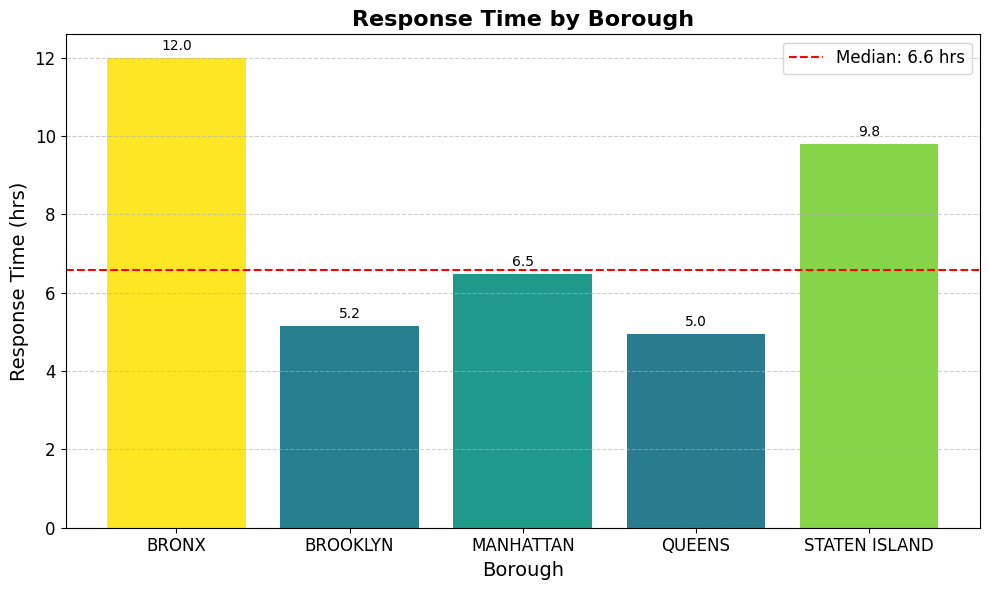

In [124]:
borough_resp = data[['Borough','Response Time (hrs)']].groupby('Borough').median().reset_index()

# Remove the "Unspecified" category
borough_resp = borough_resp[borough_resp['Borough'] != 'Unspecified']

# Create the bar chart
plt.figure(figsize=(10, 6))
#bars = plt.bar(borough_resp['Borough'], borough_resp['Response Time (hrs)'], 
 #              color=plt.cm.Paired(range(len(borough_resp))))


bars = plt.bar(
    borough_resp['Borough'], 
    borough_resp['Response Time (hrs)'], 
    color=plt.cm.viridis(borough_resp['Response Time (hrs)'] / max(borough_resp['Response Time (hrs)']))
)


# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
             f'{bar.get_height():.1f}', ha='center', fontsize=10)

avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Borough', fontsize=16, fontweight='bold')
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


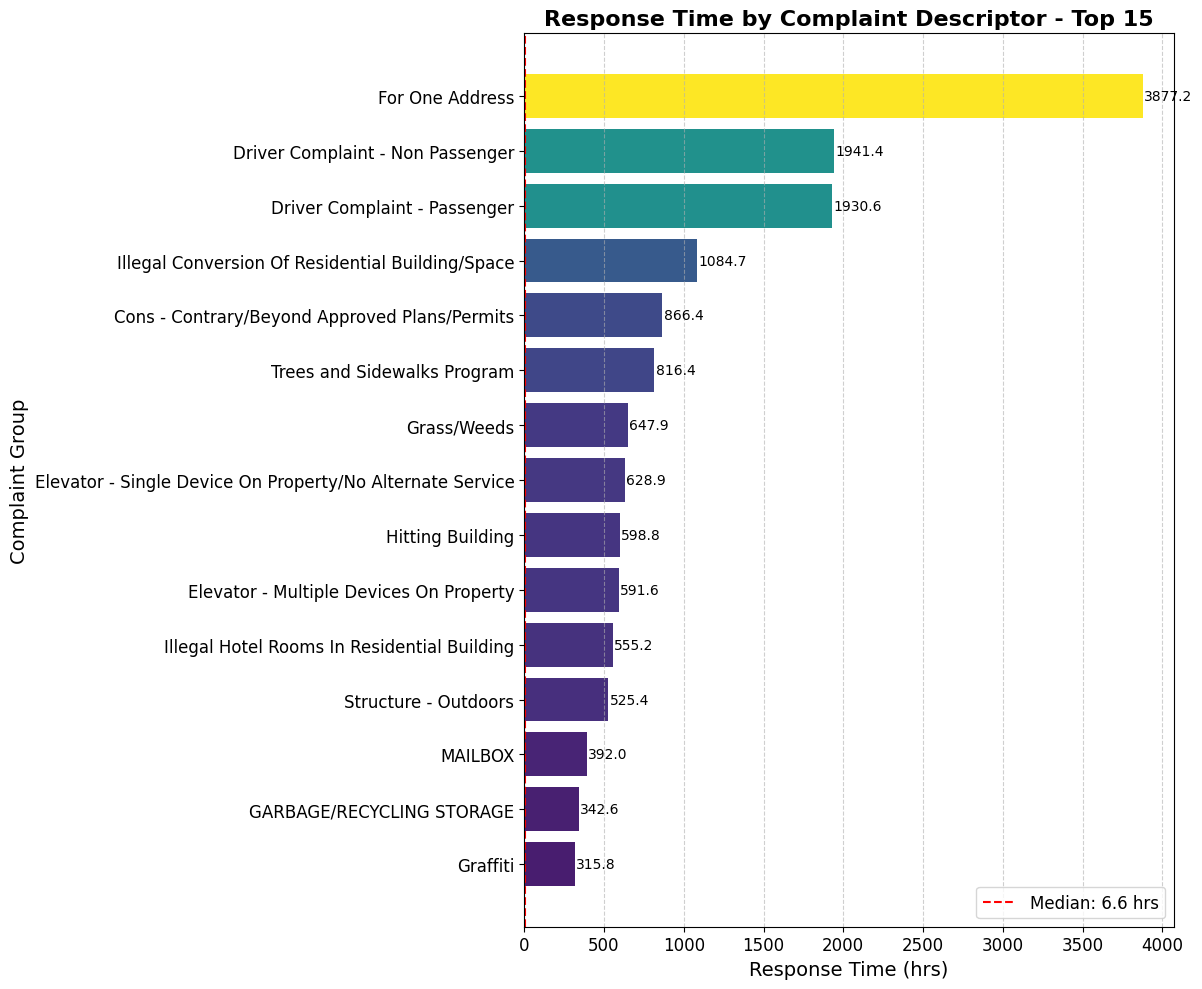

In [126]:
# Average response time by Descriptor
descriptor_resp = data.groupby('Descriptor')['Response Time (hrs)'].median().sort_values(ascending=False).reset_index()[0:15]


# Sort data by response time
descriptor_resp = descriptor_resp.sort_values('Response Time (hrs)', ascending=True)


# Create the horizontal bar chart
plt.figure(figsize=(12, 10))
bars = plt.barh(
    descriptor_resp['Descriptor'], 
    descriptor_resp['Response Time (hrs)'], 
    color=plt.cm.viridis(descriptor_resp['Response Time (hrs)'] / max(descriptor_resp['Response Time (hrs)']))
)

# Add labels on each bar
for bar in bars:
    plt.text(
        bar.get_width() + 10,  # Positioning text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.1f}', 
        va='center', fontsize=10
    )

# Add a vertical line for the average response time
avg_response = data['Response Time (hrs)'].median()
plt.axvline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time by Complaint Descriptor - Top 15', fontsize=16, fontweight='bold')
plt.xlabel('Response Time (hrs)', fontsize=14)
plt.ylabel('Complaint Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='lower right')

plt.tight_layout()
plt.show()

<h4>Median Response Time By Date/Time</h4>

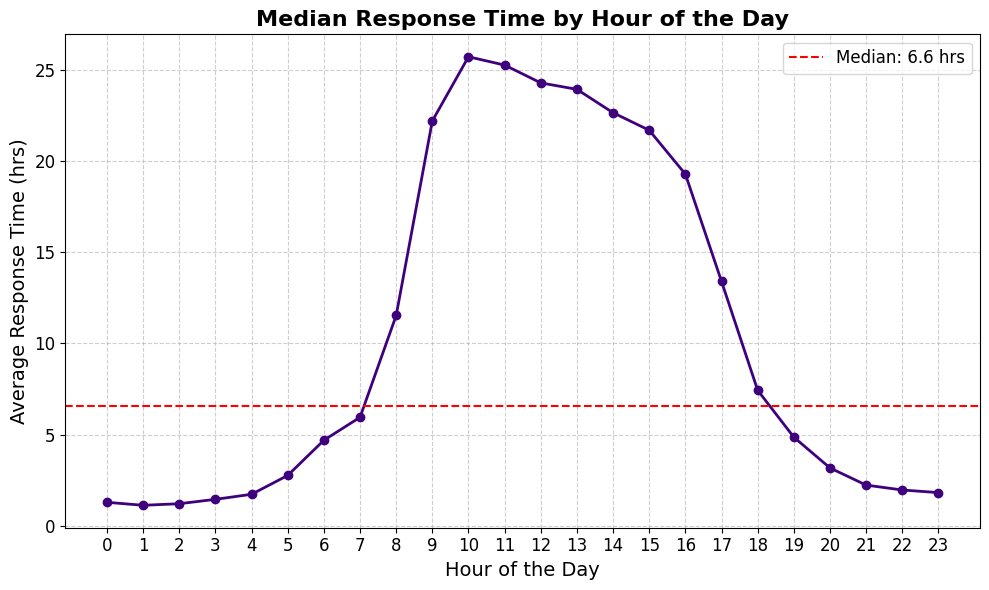

In [128]:
resp_hrs = data[['Response Time (hrs)']].groupby(data['Created Date'].dt.hour).median().reset_index()

# Visualizing with an appealing style
plt.figure(figsize=(10, 6))
plt.plot(resp_hrs['Created Date'], resp_hrs['Response Time (hrs)'], marker='o', linestyle='-', linewidth=2, color='#3F007D')
plt.title('Median Response Time by Hour of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Response Time (hrs)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add legend
plt.legend(fontsize=12, loc='upper right')

plt.show()


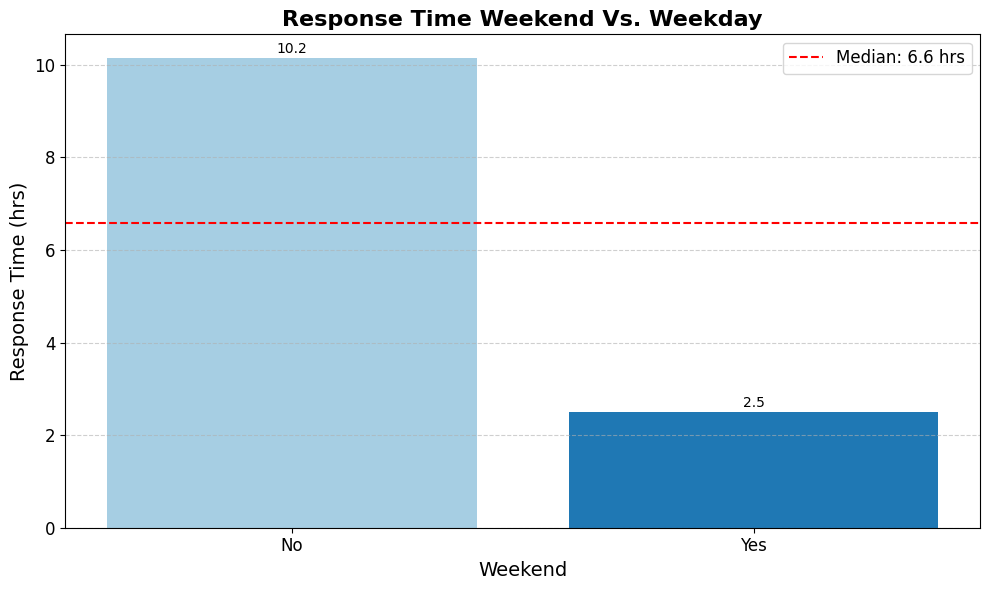

In [130]:
weekend_resp = data[['Is_Weekend','Response Time (hrs)']].groupby('Is_Weekend').median().reset_index()


# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(weekend_resp['Is_Weekend'], weekend_resp['Response Time (hrs)'], 
               color=plt.cm.Paired(range(len(weekend_resp))))

# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{bar.get_height():.1f}', ha='center', fontsize=10)

avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time Weekend Vs. Weekday', fontsize=16, fontweight='bold')
plt.xlabel('Weekend', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)


weekend_labels = ["No", "Yes"]
plt.xticks(ticks=weekend_resp['Is_Weekend'], labels=weekend_labels, fontsize=12)

plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

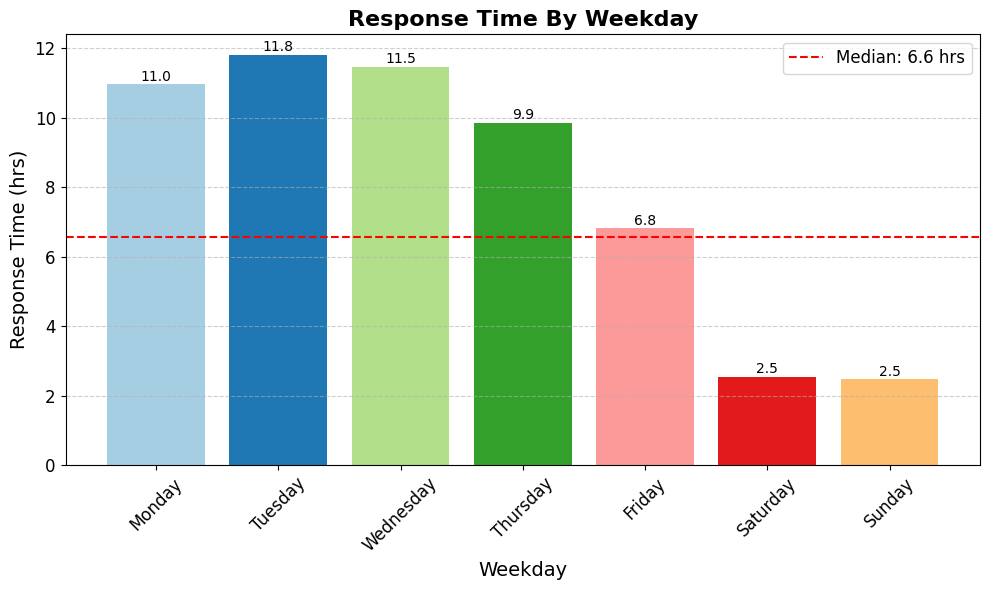

In [132]:
weekday_resp = data[['Created Weekday','Response Time (hrs)']].groupby('Created Weekday').median().reset_index()


# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(weekday_resp['Created Weekday'], weekday_resp['Response Time (hrs)'], 
               color=plt.cm.Paired(range(len(weekday_resp))))

# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{bar.get_height():.1f}', ha='center', fontsize=10)

avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time By Weekday', fontsize=16, fontweight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)

# Change x-ticks from numbers to day names
day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(ticks=weekday_resp['Created Weekday'], labels=day_labels, rotation=45, fontsize=12)

plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)


# Add legend
plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

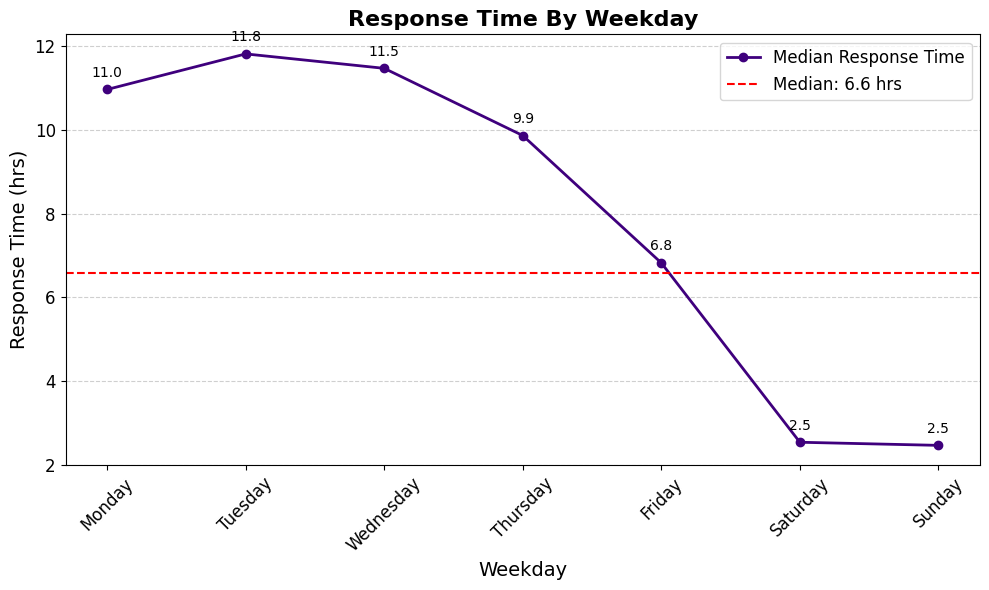

In [134]:
# Group data by 'Created Weekday' and calculate median response time
weekday_resp = data[['Created Weekday', 'Response Time (hrs)']].groupby('Created Weekday').median().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(weekday_resp['Created Weekday'], weekday_resp['Response Time (hrs)'], marker='o', linestyle='-', 
         color='#3F007D', linewidth=2, label='Median Response Time')

# Add labels on each data point
for i, value in enumerate(weekday_resp['Response Time (hrs)']):
    plt.text(weekday_resp['Created Weekday'][i], value + 0.3, f'{value:.1f}', 
             ha='center', fontsize=10)

# Add a horizontal line for the overall median response time
avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time By Weekday', fontsize=16, fontweight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)

# Change x-ticks from numbers to weekday names
day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.xticks(ticks=weekday_resp['Created Weekday'], labels=day_labels, rotation=45, fontsize=12)

# Customize y-axis and grid
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='upper right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


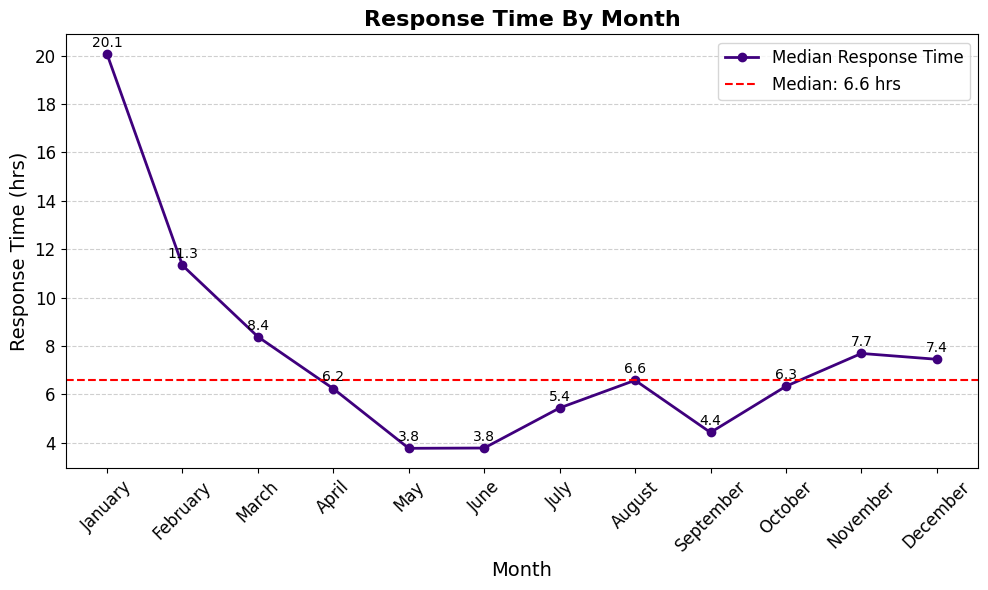

In [136]:
# Group data by 'Created Month' and calculate median response time
month_resp = data[['Created Month', 'Response Time (hrs)']].groupby('Created Month').median().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(month_resp['Created Month'], month_resp['Response Time (hrs)'], marker='o', linestyle='-', 
         color='#3F007D', linewidth=2, label='Median Response Time')

# Add labels on each data point
for i, value in enumerate(month_resp['Response Time (hrs)']):
    plt.text(month_resp['Created Month'][i], value + 0.3, f'{value:.1f}', 
             ha='center', fontsize=10)

# Add a horizontal line for the overall median response time
avg_response = data['Response Time (hrs)'].median()
plt.axhline(avg_response, color='red', linestyle='--', label=f'Median: {avg_response:.1f} hrs')

# Add titles and labels
plt.title('Response Time By Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Response Time (hrs)', fontsize=14)

# Change x-ticks from numbers to month names
day_labels = ["January", "February", "March", "April", "May", "June", "July", 
              "August", "September", "October", "November", "December"]
plt.xticks(ticks=month_resp['Created Month'], labels=day_labels, rotation=45, fontsize=12)

# Customize y-axis and grid
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(fontsize=12, loc='upper right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<h2>Outlier Analysis</h2>

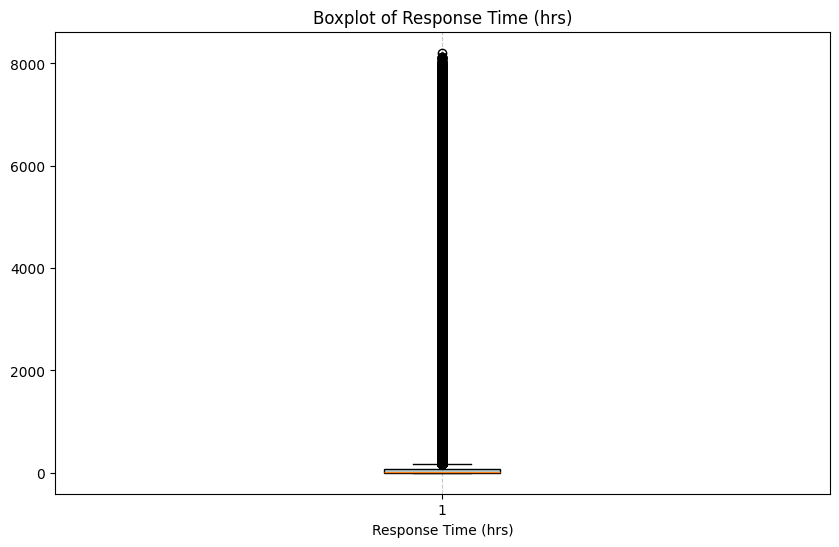

In [138]:
# Create a boxplot for 'Response Time (hrs)' to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data['Response Time (hrs)'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Response Time (hrs)')
plt.xlabel('Response Time (hrs)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [140]:
lower_limit = data['Response Time (hrs)'].quantile(0.01)
upper_limit = data['Response Time (hrs)'].quantile(0.95)
data_cleaned = data[(data['Response Time (hrs)'] >= lower_limit) & (data['Response Time (hrs)'] <= upper_limit)]

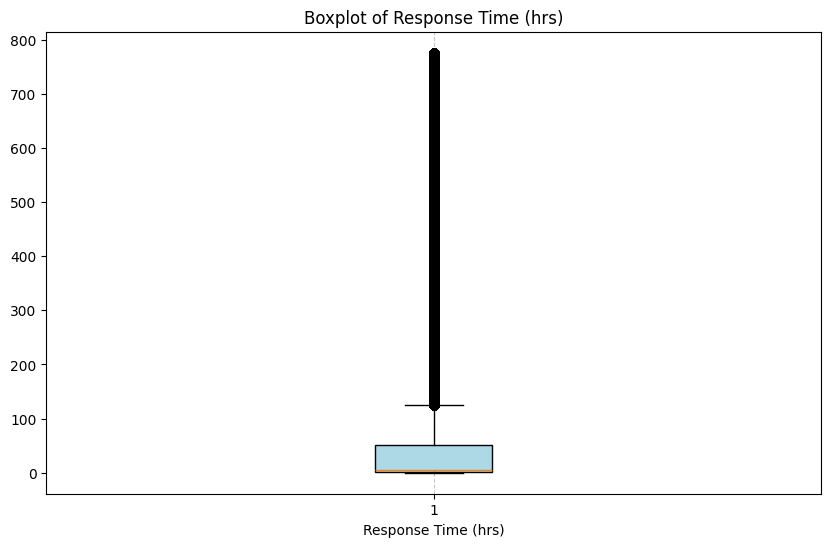

In [142]:
# Create a boxplot for 'Response Time (hrs)' to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data_cleaned['Response Time (hrs)'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Response Time (hrs)')
plt.xlabel('Response Time (hrs)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h2>Log Transforming Response Time</h2>
<p>The log transformation squeezes the data, making extreme values (outliers) less dominant.This helps the model learn better relationships without over-focusing on rare extreme cases.</p>

In [144]:
data_cleaned['Log_Response_Time'] = np.log1p(data_cleaned['Response Time (hrs)'])

/var/folders/vr/10ysjkdj22l84y4h_d1c1j5w0000gn/T/ipykernel_5534/489702664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Log_Response_Time'] = np.log1p(data_cleaned['Response Time (hrs)'])


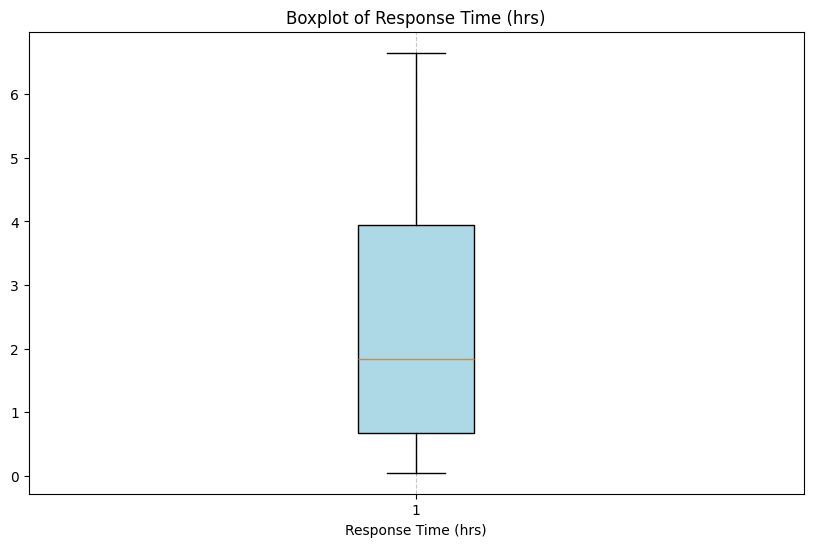

In [146]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_cleaned['Log_Response_Time'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Response Time (hrs)')
plt.xlabel('Response Time (hrs)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

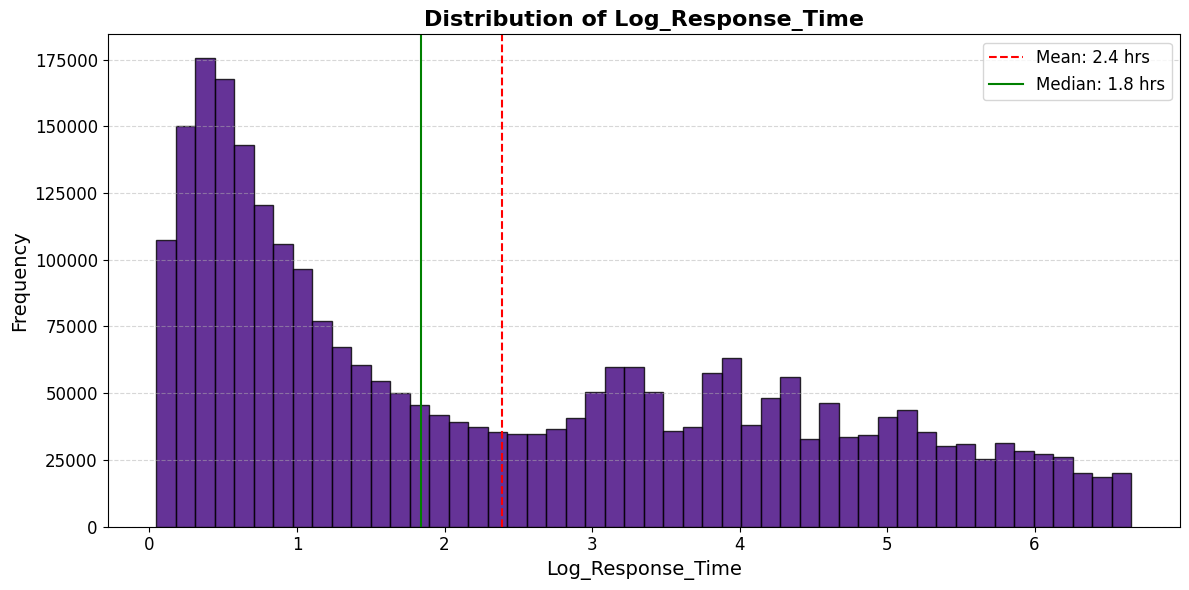

In [148]:
# Histogram for response time
plt.figure(figsize=(12, 6))
plt.hist(data_cleaned['Log_Response_Time'], bins=50, color='#3F007D', edgecolor='black', alpha=0.8)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add mean and median lines
mean_val = data_cleaned['Log_Response_Time'].mean()
median_val = data_cleaned['Log_Response_Time'].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f} hrs')
plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_val:.1f} hrs')

# Titles and labels
plt.title('Distribution of Log_Response_Time', fontsize=16, fontweight='bold')
plt.xlabel('Log_Response_Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customizing tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a legend
plt.legend(fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [150]:
data_cleaned['Log_Response_Time'].max()

6.655101024964026

<h2> Model Development </h2>

In [442]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb



def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return model

In [444]:
# One-Hot Encoding for Categorical Variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Define Features and Target
X = data_cleaned[['Agency', 'Complaint Type','Descriptor','Location Type','Borough','City','Community Board',
                 'is_landmark', 'Created Hour','Police Precinct','Created Weekday']]

y = data_cleaned['Response Time (hrs)']

# Encode Categorical Variables
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [445]:
# Linear Regression
lr_model = LinearRegression()
train_and_evaluate(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")

Linear Regression - MAE: 44.11, RMSE: 92.18


LinearRegression()

In [261]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

Random Forest - MAE: 41.24, RMSE: 93.45


RandomForestRegressor(random_state=42)

In [447]:
# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
train_and_evaluate(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

XGBoost - MAE: 41.83, RMSE: 90.24


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [534]:
# Calculate Baseline Predictions (mean and median)
mean_baseline = y_train.mean()

# Predict on the test set
y_pred_mean = np.full_like(y_test, mean_baseline)

# Evaluate Baseline Predictions
mae_mean = mean_absolute_error(y_test, y_pred_mean)
rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_mean))

# Print Results
print("Baseline Results:")
print(f"Mean Baseline - MAE: {mae_mean:.2f}, RMSE: {rmse_mean:.2f}")

Baseline Results:
Mean Baseline - MAE: 78.47, RMSE: 126.41


<h3>XGBoost Model - Feature Selection</h3>

In [449]:
# Extract Feature Importance
feature_importances = xgb_model.feature_importances_
feature_names = encoder.get_feature_names_out(X.columns)

# Combine into a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()

# Select features covering 98% of cumulative importance
selected_features = importance_df[importance_df['Cumulative Importance'] <= 0.99]['Feature']

print(f"Number of features covering 99% of importance: {len(selected_features)} out of {len(importance_df)} features")


Number of features covering 99% of importance: 214 out of 491 features


<h3>XGBoost Model - Retrain on Selected Features</h3>

In [450]:
# Get indices of the selected features
selected_feature_indices = [list(encoder.get_feature_names_out(X.columns)).index(f) for f in selected_features]

# Filter the training and testing data
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

In [451]:
# Initialize XGBoost Model
xgb_model_retrained = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100, 
    learning_rate=0.05, 
    max_depth=8, 
    subsample=0.8, 
    colsample_bytree=0.8,
    random_state=42
)

# Retrain the model on the reduced features
xgb_model_retrained.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = xgb_model_retrained.predict(X_test_selected)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_selected)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_selected))

print("XGBoost Results on Selected Features:")
print(f"Mean Absolute Error (MAE): {mae:.2f} hours")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} hours")

XGBoost Results on Selected Features:
Mean Absolute Error (MAE): 43.78 hours
Root Mean Squared Error (RMSE): 92.02 hours


In [318]:
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [8, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=2, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters and Model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate Tuned Model
train_and_evaluate(best_model, X_train, X_test, y_train, y_test, "Tuned XGBoost")


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8; total time=  12.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8; total time=  12.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100, subsample=1.0; total time=  11.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=100, subsample=1.0; total time=  11.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=0.8; total time=  25.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=0.8; total time=  26.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=1.0; total time=  25.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=1.0; total time=  23.4s
[CV] END co

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)